In [2]:
import pandas as pd
import re
import seaborn as sns 
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('Dataset/cleaned_crimes_dataset.csv')

In [4]:
print(f"Shape: {df.shape}\n")

Shape: (2671664, 6)



In [5]:
df.head()

,ID,Date,Primary_Type,Description,Location_Description,Community_Area
0,13311263,2022-07-29 03:39:00,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,30.0
1,13053066,2023-01-03 16:44:00,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,26.0
2,12131221,2020-08-10 09:45:00,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,24.0
3,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,32.0
4,13203321,2023-09-06 17:00:00,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),32.0


In [6]:
key_columns = ['ID', 'Date', 'Primary_Type', 'Community_Area','Location_Description']
df = df[key_columns]

In [7]:
df.head()

,ID,Date,Primary_Type,Community_Area,Location_Description
0,13311263,2022-07-29 03:39:00,OFFENSE INVOLVING CHILDREN,30.0,RESIDENCE
1,13053066,2023-01-03 16:44:00,NARCOTICS,26.0,SIDEWALK
2,12131221,2020-08-10 09:45:00,ROBBERY,24.0,STREET
3,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,32.0,HOTEL/MOTEL
4,13203321,2023-09-06 17:00:00,CRIMINAL DAMAGE,32.0,PARKING LOT / GARAGE (NON RESIDENTIAL)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671664 entries, 0 to 2671663
Data columns (total 5 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary_Type          object 
 3   Community_Area        float64
 4   Location_Description  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 101.9+ MB


In [9]:
# Check if all values in 'Community_Area' are equal to their integer representation
is_whole_number = (df['Community_Area'] == df['Community_Area'].astype(int)).all()

if is_whole_number:
    print("All values in 'Community_Area' are whole numbers (e.g., 1.0, 2.0).")
else:
    print("Some values in 'Community_Area' have a fractional component (e.g., 1.5).")

All values in 'Community_Area' are whole numbers (e.g., 1.0, 2.0).


In [10]:
# Convert 'Community_Area' to integer type
df['Community_Area'] = df['Community_Area'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671664 entries, 0 to 2671663
Data columns (total 5 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary_Type          object
 3   Community_Area        int64 
 4   Location_Description  object
dtypes: int64(2), object(3)
memory usage: 101.9+ MB


In [12]:
# Convert 'Date' to datetime type and extract components
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [13]:
df.head()

,ID,Date,Primary_Type,Community_Area,Location_Description,Month,Hour,Year
0,13311263,2022-07-29 03:39:00,OFFENSE INVOLVING CHILDREN,30,RESIDENCE,7,3,2022
1,13053066,2023-01-03 16:44:00,NARCOTICS,26,SIDEWALK,1,16,2023
2,12131221,2020-08-10 09:45:00,ROBBERY,24,STREET,8,9,2020
3,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,32,HOTEL/MOTEL,8,10,2017
4,13203321,2023-09-06 17:00:00,CRIMINAL DAMAGE,32,PARKING LOT / GARAGE (NON RESIDENTIAL),9,17,2023


In [14]:
df.drop("Date", axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671664 entries, 0 to 2671663
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Primary_Type          object
 2   Community_Area        int64 
 3   Location_Description  object
 4   Month                 int32 
 5   Hour                  int32 
 6   Year                  int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 112.1+ MB


In [16]:
df.head()

,ID,Primary_Type,Community_Area,Location_Description,Month,Hour,Year
0,13311263,OFFENSE INVOLVING CHILDREN,30,RESIDENCE,7,3,2022
1,13053066,NARCOTICS,26,SIDEWALK,1,16,2023
2,12131221,ROBBERY,24,STREET,8,9,2020
3,11227634,CRIM SEXUAL ASSAULT,32,HOTEL/MOTEL,8,10,2017
4,13203321,CRIMINAL DAMAGE,32,PARKING LOT / GARAGE (NON RESIDENTIAL),9,17,2023


In [17]:
df["Primary_Type"].value_counts()

Primary_Type
THEFT                                604870
BATTERY                              491004
CRIMINAL DAMAGE                      297208
ASSAULT                              216894
DECEPTIVE PRACTICE                   179449
OTHER OFFENSE                        171901
MOTOR VEHICLE THEFT                  156444
NARCOTICS                            112199
BURGLARY                             107020
ROBBERY                              100357
WEAPONS VIOLATION                     70049
CRIMINAL TRESPASS                     58369
OFFENSE INVOLVING CHILDREN            22861
PUBLIC PEACE VIOLATION                13614
SEX OFFENSE                           12692
CRIMINAL SEXUAL ASSAULT               10393
INTERFERENCE WITH PUBLIC OFFICER       9481
HOMICIDE                               6952
CRIM SEXUAL ASSAULT                    6616
PROSTITUTION                           5561
ARSON                                  4964
STALKING                               3407
LIQUOR LAW VIOLATIO

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671664 entries, 0 to 2671663
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Primary_Type          object
 2   Community_Area        int64 
 3   Location_Description  object
 4   Month                 int32 
 5   Hour                  int32 
 6   Year                  int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 112.1+ MB


In [19]:
# Load the mapping file
mapping_df = pd.read_csv("Dataset/mapping.csv")

# We only need Primary_Type and Assigned_Severity_Score for mapping
mapping_df = mapping_df[["Primary_Type", "Assigned_Severity_Score"]]

# Merge the two on Primary_Type
df = df.merge(mapping_df, on="Primary_Type", how="left")

# Optional: rename for clarity
df.rename(columns={"Assigned_Severity_Score": "Severity_Score"}, inplace=True)

In [20]:
df.head()

,ID,Primary_Type,Community_Area,Location_Description,Month,Hour,Year,Severity_Score
0,13311263,OFFENSE INVOLVING CHILDREN,30,RESIDENCE,7,3,2022,14.0714
1,13053066,NARCOTICS,26,SIDEWALK,1,16,2023,10.0833
2,12131221,ROBBERY,24,STREET,8,9,2020,11.8909
3,11227634,CRIM SEXUAL ASSAULT,32,HOTEL/MOTEL,8,10,2017,27.0000
4,13203321,CRIMINAL DAMAGE,32,PARKING LOT / GARAGE (NON RESIDENTIAL),9,17,2023,5.0350


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671664 entries, 0 to 2671663
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary_Type          object 
 2   Community_Area        int64  
 3   Location_Description  object 
 4   Month                 int32  
 5   Hour                  int32  
 6   Year                  int32  
 7   Severity_Score        float64
dtypes: float64(1), int32(3), int64(2), object(2)
memory usage: 132.5+ MB


In [22]:
# Check for null values
null_count = df['Severity_Score'].isnull().sum()
print(f"Number of null values in Severity_Score: {null_count}")

# Check for zero values
zero_count = (df['Severity_Score'] == 0).sum()
print(f"Number of zero values in Severity_Score: {zero_count}")

# Show rows with null values in Severity_Score
print("\nSample of rows with null Severity_Score:")
print(df[df['Severity_Score'].isnull()].head())

Number of null values in Severity_Score: 192
Number of zero values in Severity_Score: 0

Sample of rows with null Severity_Score:
              ID    Primary_Type  Community_Area  \
59879   13280353    NON-CRIMINAL              28   
104483   9963295    NON-CRIMINAL              30   
108193   9917219  NON - CRIMINAL              11   
123187  10128364  NON - CRIMINAL              35   
124273  10132522    NON-CRIMINAL              65   

                         Location_Description  Month  Hour  Year  \
59879   POLICE FACILITY / VEHICLE PARKING LOT     11    13  2023   
104483                              APARTMENT      2    15  2015   
108193        POLICE FACILITY/VEH PARKING LOT      1    20  2015   
123187        POLICE FACILITY/VEH PARKING LOT      6    10  2015   
124273                                 STREET      6    22  2015   

        Severity_Score  
59879              NaN  
104483             NaN  
108193             NaN  
123187             NaN  
124273             NaN 

In [23]:
# Get unique Primary_Types with NaN severity scores
nan_crime_types = df[df['Severity_Score'].isna()]['Primary_Type'].unique()
print("Crime types with NaN severity scores:")
for crime_type in nan_crime_types:
    count = df[(df['Primary_Type'] == crime_type) & (df['Severity_Score'].isna())].shape[0]
    print(f"{crime_type}: {count} occurrences")

Crime types with NaN severity scores:
NON-CRIMINAL: 161 occurrences
NON - CRIMINAL: 25 occurrences
NON-CRIMINAL (SUBJECT SPECIFIED): 6 occurrences


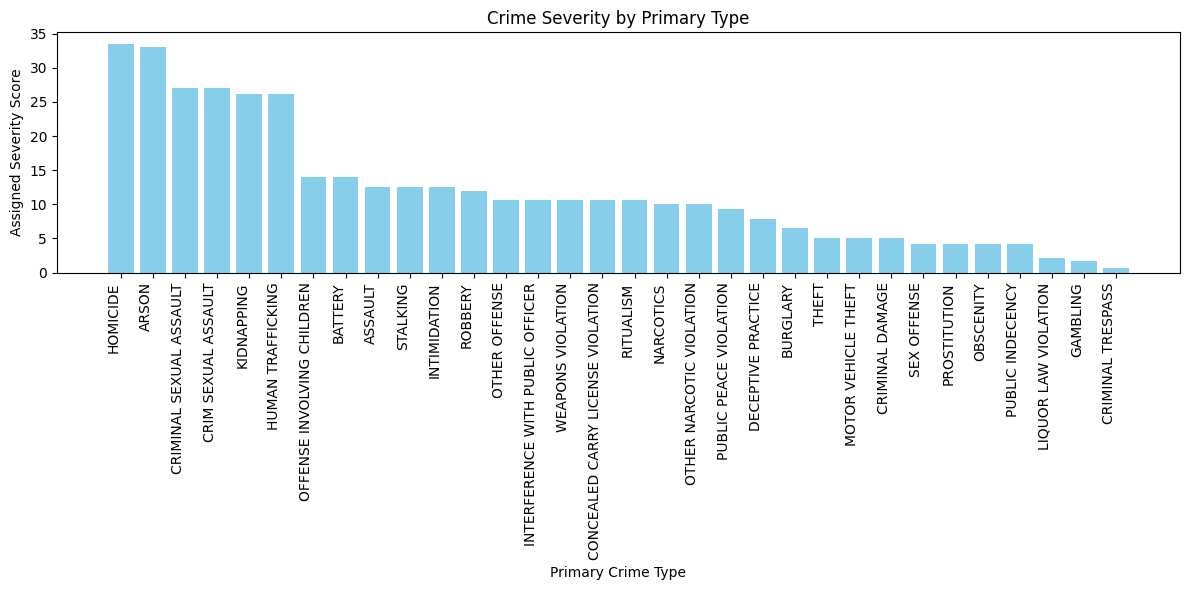

In [24]:
import matplotlib.pyplot as plt


# Sort by severity (optional, makes the plot more readable)
mapping_df = mapping_df.sort_values("Assigned_Severity_Score", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(mapping_df["Primary_Type"], mapping_df["Assigned_Severity_Score"], color='skyblue')

plt.xticks(rotation=90, ha='right')
plt.xlabel("Primary Crime Type")
plt.ylabel("Assigned Severity Score")
plt.title("Crime Severity by Primary Type")
plt.tight_layout()
plt.show()


In [25]:
df.head()

,ID,Primary_Type,Community_Area,Location_Description,Month,Hour,Year,Severity_Score
0,13311263,OFFENSE INVOLVING CHILDREN,30,RESIDENCE,7,3,2022,14.0714
1,13053066,NARCOTICS,26,SIDEWALK,1,16,2023,10.0833
2,12131221,ROBBERY,24,STREET,8,9,2020,11.8909
3,11227634,CRIM SEXUAL ASSAULT,32,HOTEL/MOTEL,8,10,2017,27.0000
4,13203321,CRIMINAL DAMAGE,32,PARKING LOT / GARAGE (NON RESIDENTIAL),9,17,2023,5.0350


In [26]:
# Count occurrences of the target variants before replacement
before_crim_sexual = df['Primary_Type'].str.contains(r'(?i)^crim\s*sexual\s*assault$', regex=True).sum()
before_other_narc = df['Primary_Type'].str.contains(r'(?i)^other\s*-?\s*narcotic\s*violation$', regex=True).sum()
print(f"Before - Crim Sexual Assault: {before_crim_sexual}, Other Narcotic violation: {before_other_narc}")

# Do case-insensitive, exact-pattern replacements and standardize to mapping-style uppercase
df['Primary_Type'] = df['Primary_Type'].str.replace(
    r'(?i)^crim\s*sexual\s*assault$', 'CRIMINAL SEXUAL ASSAULT', regex=True
)
df['Primary_Type'] = df['Primary_Type'].str.replace(
    r'(?i)^other\s*-?\s*narcotic\s*violation$', 'NARCOTICS', regex=True
)

# Count occurrences after replacement
after_crim_sexual = (df['Primary_Type'] == 'CRIMINAL SEXUAL ASSAULT').sum()
after_narcotics = (df['Primary_Type'] == 'NARCOTICS').sum()
print(f"After - CRIMINAL SEXUAL ASSAULT: {after_crim_sexual}, NARCOTICS: {after_narcotics}")

Before - Crim Sexual Assault: 6616, Other Narcotic violation: 60
After - CRIMINAL SEXUAL ASSAULT: 17009, NARCOTICS: 112259


In [27]:
df['Location_Description'].value_counts()

Location_Description
STREET                658024
APARTMENT             431206
RESIDENCE             408341
SIDEWALK              187065
SMALL RETAIL STORE     73954
                       ...  
LAUNDRY ROOM               1
TRAILER                    1
ROOF                       1
DELIVERY TRUCK             1
ROOMING HOUSE              1
Name: count, Length: 201, dtype: int64

In [28]:
# Convert to uppercase and remove leading/trailing spaces
df['Location_Description'] = df['Location_Description'].str.strip().str.upper()

# Replace variations of similar locations
location_mapping = {
    r'APARTMENT\s*': 'APARTMENT',
    r'RESIDENCE\s*': 'RESIDENCE',
    r'STREET\s*': 'STREET',
    r'SIDEWALK\s*': 'SIDEWALK',
    r'PARKING LOT\s*\/?\s*GARAGE.*': 'PARKING LOT/GARAGE',
    r'VEHICLE\s*(?:NON)?-?\s*COMMERCIAL': 'VEHICLE',
    r'VEHICLE-?\s*': 'VEHICLE',
    r'SCHOOL\s*,?\s*(?:PUBLIC|PRIVATE)?\s*': 'SCHOOL',
    r'HOTEL\s*\/?\s*MOTEL': 'HOTEL/MOTEL'
}

# Apply the mapping using regex
for pattern, replacement in location_mapping.items():
    df['Location_Description'] = df['Location_Description'].str.replace(pattern, replacement, regex=True)

# Display the updated value counts
print("Updated Location Description categories:")
print(df['Location_Description'].value_counts().head(10))

Updated Location Description categories:
Location_Description
STREET                658024
APARTMENT             431206
RESIDENCE             408341
SIDEWALK              187065
PARKING LOT/GARAGE     85112
SMALL RETAIL STORE     73954
RESTAURANT             59436
ALLEY                  56931
OTHER                  55959
VEHICLE                45947
Name: count, dtype: int64


In [29]:
# Define the output file path
output_path = 'Dataset/mapped_crimes_dataset2.csv'

# Export the DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
df.to_csv(output_path, index=False)

print(f"DataFrame successfully exported to {output_path}")

DataFrame successfully exported to Dataset/mapped_crimes_dataset2.csv
